#  Medical Insurance Cost Prediction

<img src="insurance.webp" style="width:800px; ">

**Student Name: M.R.M.Ashfaq** <br>
**Registration Number: EG/2021/4417** <br>
**-----------------------------**  
**Student Name: M.K.M.Shamil**<br>
**Registration Number: EG/2021/4810**


In this project, we aim to utilize the **Medical Cost Personal Datasets** dataset from Kaggle, which contains various features that impact medical insurance costs. The primary objective is to predict medical insurance costs using machine learning models such as Linear Regression and Random Forest and compare their performance to determine the better model. The workflow includes exploratory data analysis (EDA), data preprocessing,  and training machine learning models.

Data Link: https://www.kaggle.com/datasets/mirichoi0218/insurance


#### Features of the Dataset

There are alltogether 06 features and the target variable (charges). A description of the dataset features is provided below :

* **age** : Age of the insured
* **sex** : Gender of the insured
* **bmi** : Body Mass Index ( Unit $kg/m^2$)
* **children** : Number of children
* **smoker** : Indicator if they smoke
* **region** : Region where the insured lives


So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict medical insurance costs.

## Load the Necessary Libraries

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

## Data Loading

In [279]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('./insurance.csv')

In [280]:
# First 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)

##### Count of Rows and Column

In [281]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

##### Info about datasets

In [282]:
# Concise summary using info()
print("Insurance Dataset Info:")
insurance_dataset.info()

Insurance Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Features Types

In [283]:
# Identify numerical features
numerical_features = insurance_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical features
categorical_features = insurance_dataset.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['age', 'bmi', 'children', 'charges']
Categorical Features: ['sex', 'smoker', 'region']


##### Numerical feature description

In [284]:
# Generate descriptive analytics for numerical features
numerical_summary = insurance_dataset[numerical_features].describe()

# Print the descriptive statistics
print("Descriptive Analytics for Numerical Features:")
print(numerical_summary)


Descriptive Analytics for Numerical Features:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


##### Categorical feature description

In [285]:
#count og sex attributes
insurance_dataset['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [286]:
#count og smoker attributesi
insurance_dataset['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [287]:
#count og region attributes
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

##### Checking null values


In [288]:
# Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Checking duplicates


In [289]:
# Checking for duplicated values
insurance_dataset.duplicated().sum()

1

## Data Visualization



#### Outliers


For age attributes


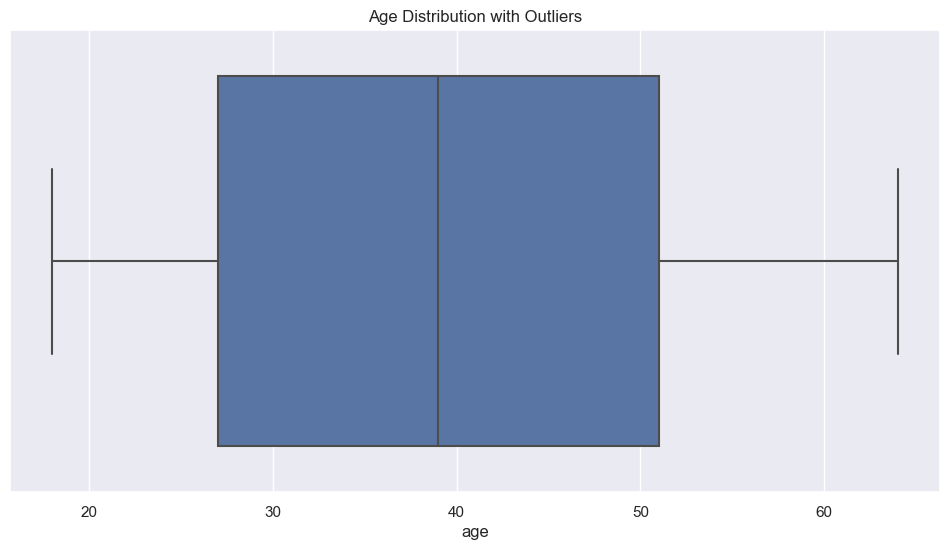

In [290]:
sns.set()

plt.figure(figsize=(12, 6))
sns.boxplot(x=insurance_dataset['age'])  
plt.title('Age Distribution with Outliers')

plt.show()

For bmi attributes


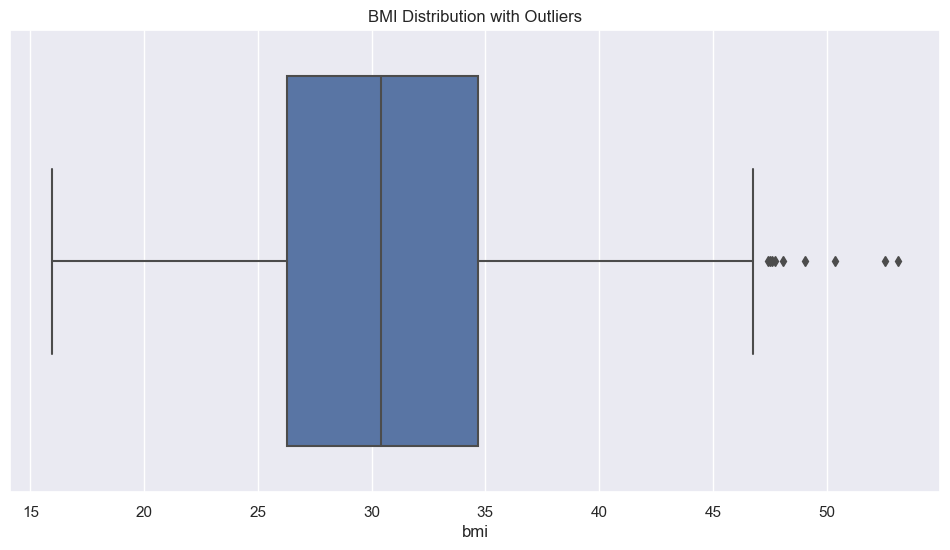

In [291]:
sns.set()

plt.figure(figsize=(12, 6))
sns.boxplot(x=insurance_dataset['bmi'])  
plt.title('BMI Distribution with Outliers')

plt.show()

For children attributes


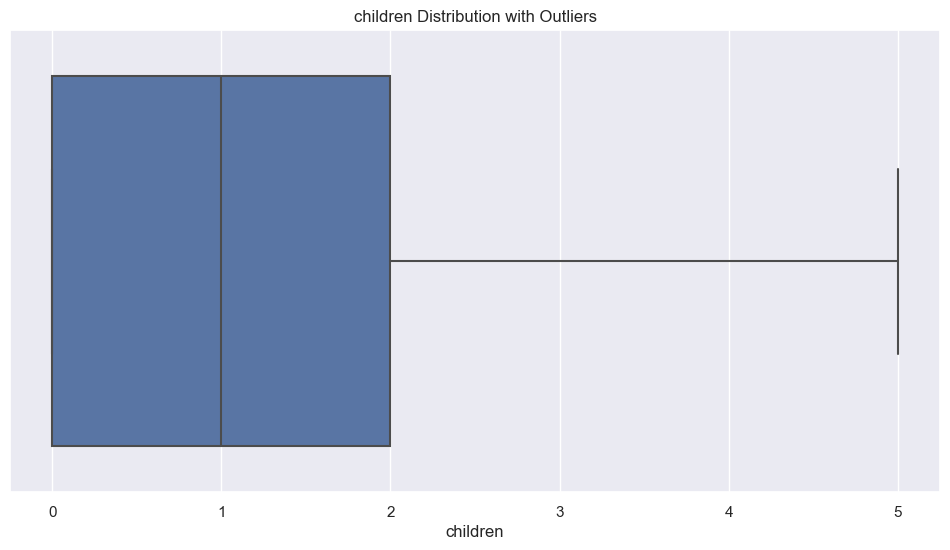

In [292]:
sns.set()

plt.figure(figsize=(12, 6))
sns.boxplot(x=insurance_dataset['children'])
plt.title('children Distribution with Outliers')

plt.show()

##### Numerical Features Graphs


Age Distribution

C:\Users\A S H F A K\AppData\Local\Temp\ipykernel_15980\2905501335.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'],)


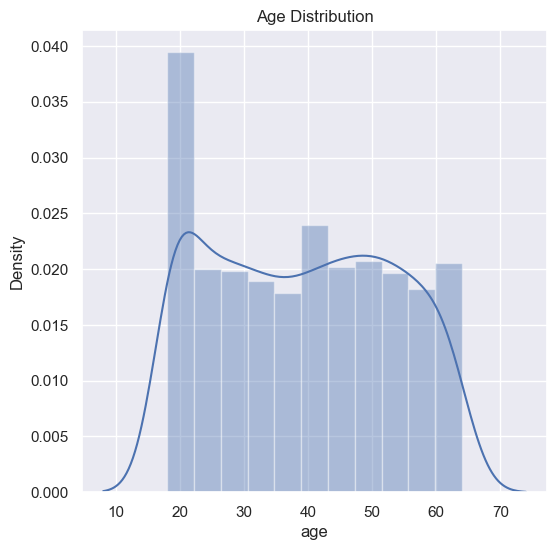

In [355]:
# Distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'],)
plt.title('Age Distribution')
plt.show()

BMI Distribution

C:\Users\A S H F A K\AppData\Local\Temp\ipykernel_15980\4119035241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


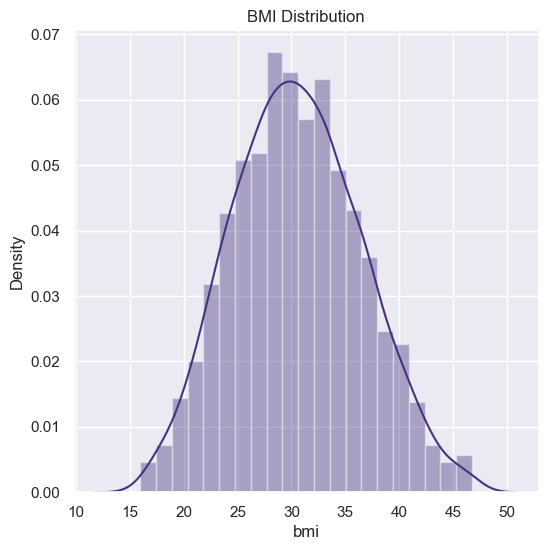

In [356]:
#bmi Distribution
plt.figure(figsize=(6,6))
sns.set_palette("viridis")
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Children Distribution

<Figure size 1200x600 with 0 Axes>

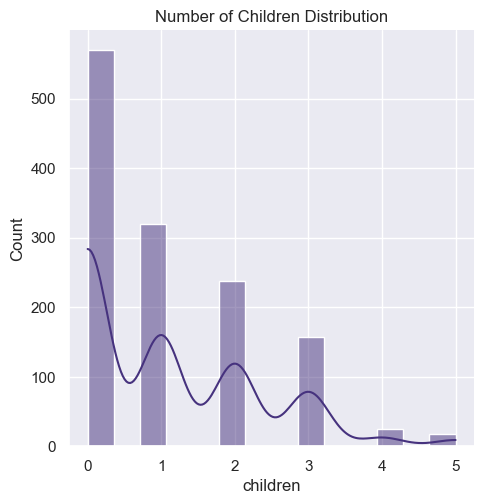

In [357]:
plt.figure(figsize=(12,6))
sns.displot(data=insurance_dataset, x='children',kde=True)
plt.title('Number of Children Distribution')
plt.show()

##### Categorical Features Graphs


Sex Distribution

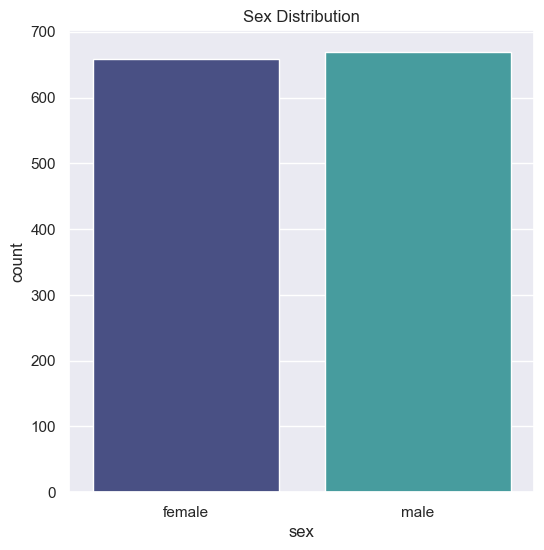

In [358]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_dataset,palette='mako')
plt.title('Sex Distribution')
plt.show()

Smoker Distribution

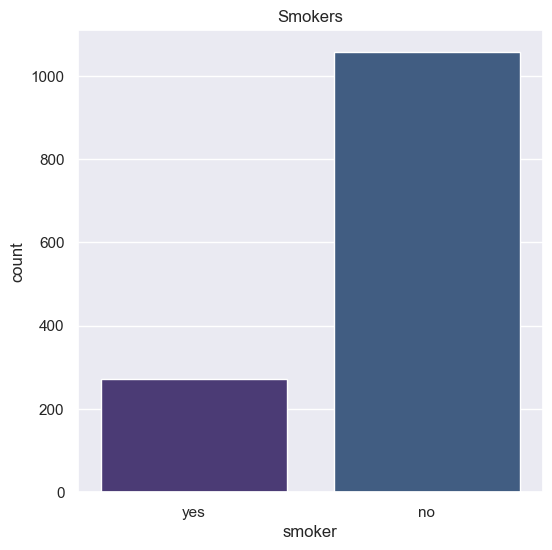

In [359]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smokers')
plt.show()

Region Distribution

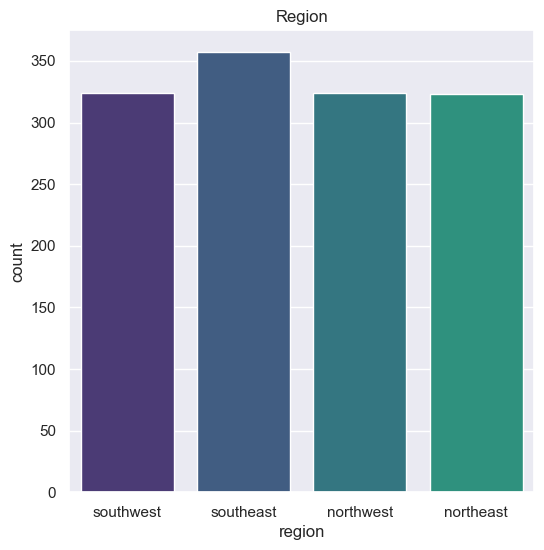

In [360]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

#### Correlation Matrix

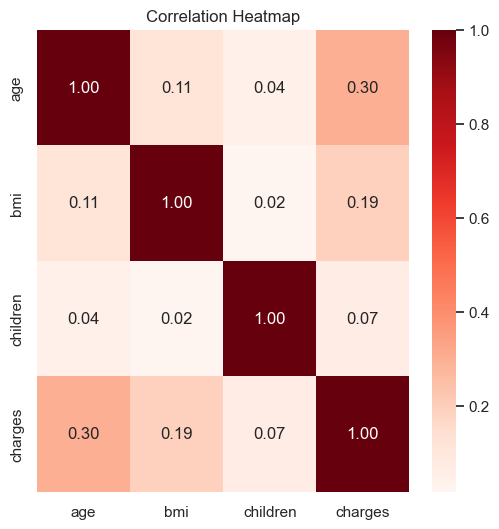

In [362]:
# Extract numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']  # Replace with actual numerical columns in your dataset

# Calculate the correlation matrix
correlation_matrix = insurance_dataset[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Chi square matrix

p value less than significat value (0.05) is considered as high correlation among the attributes 

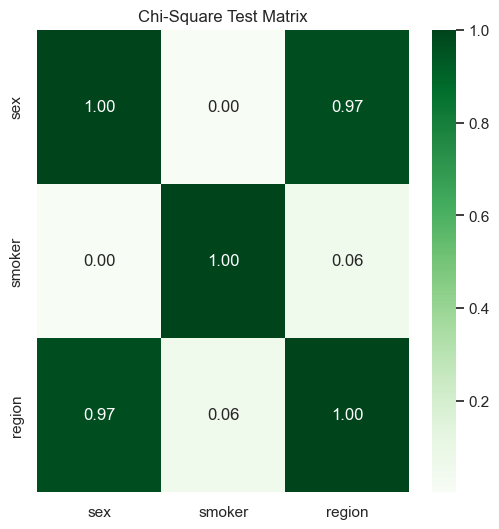

In [361]:
from scipy.stats import chi2_contingency

# Extract only the categorical columns
categorical_columns = insurance_dataset.select_dtypes(include=['object']).columns

# Initialize an empty DataFrame to store the results
chi_square_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Loop through each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            chi_square_matrix.loc[col1, col2] = 1.0  # Perfect relationship with itself
        else:
            # Create a contingency table
            contingency_table = pd.crosstab(insurance_dataset[col1], insurance_dataset[col2])
            
            # Perform Chi-Square test
            chi2, p, _, _ = chi2_contingency(contingency_table)
            
            # Store the p-value (or chi2 if preferred) in the matrix
            chi_square_matrix.loc[col1, col2] = p

# Convert to numeric type for heatmap visualization
chi_square_matrix = chi_square_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(6,6))
sns.heatmap(chi_square_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Chi-Square Test Matrix')
plt.show()

### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:**

In [301]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here

In [302]:
# Print number of training data points

# Your code goes here

In [303]:
# Print number of testing data points

# Your code goes here

In [304]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
1. <br>
2. <br>
3. <br>



In [305]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here

**Q:** Explain the observation from the above table.
> **A:**

In [306]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here

**Q:** Inteprete the above results.
> **A:**

In [307]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here

**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**

In [308]:
# Check for the null values in train set

# Your code goes here

In [309]:
# Check for the null values in test set

# Your code goes here

In [310]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**


In [311]:
# Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So there is no null value 

### Treating  Duplicate Records

In [312]:
# Number of duplicates
insurance_dataset.duplicated().sum()

1

In [313]:
# Delete this duplicate
insurance_dataset.drop_duplicates(inplace=True)

In [314]:
# Number of duplicates after removing
insurance_dataset.duplicated().sum()

0

### Treating  Oulier

##### Only BMI attributes has outlier according to box whisker plot 


Getting Outliers

In [315]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = insurance_dataset['bmi'].quantile(0.25)
Q3 = insurance_dataset['bmi'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [316]:
# Print upper biundary
print(upper_bound)

47.31500000000001


In [317]:
# Print lower biundary
print(lower_bound)

13.674999999999994


Outlier Details

In [318]:
# Identify outliers
outliers = insurance_dataset[(insurance_dataset['bmi'] < lower_bound) | (insurance_dataset['bmi'] > upper_bound)]

# Print results
print("Number of outliers in BMI:", outliers.shape[0])
print(outliers[['bmi']])


Number of outliers in BMI: 9
        bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13


In [319]:
outliers_count = insurance_dataset[(insurance_dataset['bmi'] < lower_bound) | (insurance_dataset['bmi'] > upper_bound)].shape[0]

print("Number of BMI outliers using IQR method:", outliers_count)

Number of BMI outliers using IQR method: 9


Remove Outliers

In [364]:
insurance_dataset = insurance_dataset[(insurance_dataset['bmi'] >= lower_bound) & (insurance_dataset['bmi'] <= upper_bound)]

In [321]:
outliers_count = insurance_dataset[(insurance_dataset['bmi'] < lower_bound) | (insurance_dataset['bmi'] > upper_bound)].shape[0]

print("Number of BMI outliers using IQR method:", outliers_count)

Number of BMI outliers using IQR method: 0


In [322]:
# Test the training dataset after processing the null values

# Your code goes here

In [323]:
# Process the null values in the test set

# Your code goes here

In [324]:
# Test the testing dataset after processing the null values

# Your code goes here

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**

In [325]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here

# List the categorical features

# Your code goes here

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here

# Encode the training features

# Your code goes here

In [326]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here

In [327]:
# Encode the testing features

# Your code goes here

In [328]:
# Encode the target variable in train and test sets

# Your code goes here

In [329]:
# Print the encoded labels for the training set

# Your code goes here

### Scale the Numerical Features

In [330]:
# Standard Scale the numerical features

In [331]:
# Display the head of the scaled training set

In [332]:
# Display the head of the scaled testing set

From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**<br>
> **A2 (Advantage):**

In [333]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here

In [334]:
# plot the count plots side by side before and after resampling

# Your code goes here

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [335]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here

In [336]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here

In [337]:
# Define stratified k-fold cross validation with five folds

# Your code goes here

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**

In [338]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here

In [339]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here

In [340]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [341]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here

In [342]:
# Print the best hyper parameters detected from the grid search

# Your code goes here

In [343]:
# Obtain the best estimator selected from the grid search

# Your code goes here

### Model Evaluation

In [344]:
# Fit the best estimator to the whole training dataset

# Your code goes here

In [345]:
# Calculate the accuracy considering the complete traing set

# Your code goes here

In [346]:
# Calculate the accuracy for the test set

# Your code goes here

**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**

In [347]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here

**Q:** Comment about the obtained confusion matrices. <br>
> **A:**

In [348]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here

**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**

In [349]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here

**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**